# Project: Wrangling and Analyze Data

## Introduction

#### In my analysis I have three different datasets used in analysing  WeRateDogs dataset. This involves wrangling WeRateDogs Twitter Data to create interesting analyses and visualizations. There are  3 different datasets i.e (Enhanced twitter archive data, Image Predictions file and Additional data obtained via twitter API.

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sb
import wptools
import requests
import os
from io import BytesIO

In [2]:
# Loading the 'WeRateDogs Twitter archive' data to the workspace
df_WeRateDogs= pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests 
File_name='Image_predictions.tsv'
if not os.path.isfile('Image_predictions.tsv'):
    url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response = requests.get(url)

In [4]:
if not os.path.isfile('Image_predictions.tsv'):
    with open (os.path.join('Image_predictions.tsv' , url.split('/')[1]), mode='wb') as file:
        file.write(response.content)  

In [5]:
Image_pred= pd.read_csv('Image_predictions.tsv' , sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# import tweepy

# auth = tweepy.OAuth1UserHandler(
#    consumer_key, consumer_secret, access_token, access_token_secret
# )

# api = tweepy.API(auth)

# public_tweets = api.home_timeline()
# for tweet in public_tweets:
#     print(tweet.text)

In [7]:
import json
with open('tweet_json.txt', encoding='utf-8') as file:
        for line in file.readlines():
            line = json.loads(line)
            print(line.get('user'))
            break

{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.tw

In [8]:
import json
with open('tweet_json.txt', encoding='utf-8') as file:
        for line in file.readlines():
            line = json.loads(line)
            print(line.keys())
            break

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [9]:
# import json
# listt =[]
# with open('tweet_json.txt', encoding='utf-8') as file:
#      for line in file.readlines():
#             line = json.loads(line)  
#             date= line['created_at']
#             idd = line['id']
#             fav = line['favorited']
            
            
    

In [10]:
tweet_listt = []
with open ('tweet_json.txt') as files:
    for line in files:
        tweet_listt.append(json.loads(line))
print(tweet_listt[0])        


{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [11]:
API = pd.DataFrame(tweet_listt, columns = ['id', 
                                            'retweet_count', 
                                            'favorite_count'])

## Assessing Data
Using **both** visual assessment and
programmatic assessement to assess the data.

### Twitter_archive dataset

In [12]:
# To get the first 5 rows in the dataset
df_WeRateDogs.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
df_WeRateDogs['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
df_WeRateDogs['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
# The number of null values in each column
df_WeRateDogs.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
# Sorting by rating numerator values
df_WeRateDogs['rating_numerator'].value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [17]:
# To get the column names in the dataset WeRateDogs
list(df_WeRateDogs)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [18]:
#The number of columns and rows in the dataset
df_WeRateDogs.shape

(2356, 17)

In [19]:
# Summary of the dataset
df_WeRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df_WeRateDogs.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Penny            10
Lola             10
Tucker           10
Winston           9
Bo                9
Sadie             8
the               8
Daisy             7
Buddy             7
Bailey            7
Toby              7
an                7
Jax               6
Oscar             6
Bella             6
Jack              6
Dave              6
Rusty             6
Milo              6
Stanley           6
Koda              6
Scout             6
Leo               6
Sunny             5
               ... 
Crouton           1
by                1
Zooey             1
Rascal            1
Griswold          1
Lacy              1
Cecil             1
Murphy            1
Iggy              1
Pubert            1
Vince             1
Mark              1
unacceptable      1
Tuco              1
Darrel            1
Andru             1
Pepper            1
Autumn            1
Arnold            1


In [21]:
df_WeRateDogs['source'].duplicated().sum()

2352

### Image_pred dataset

In [22]:
Image_pred.shape

(2075, 12)

In [23]:
# Summary of Image_predictions dataset
Image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# The first 7 rows
Image_pred.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


In [25]:
Image_pred['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

#### In the image prediction dataset 1532 are dogs' retweets while 543 are not dogs' retweet 

In [26]:
Image_pred['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [27]:
# The first five rows
API.head(5).T

,0,1,2,3,4
id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
retweet_count,8853,6514,4328,8964,9774
favorite_count,39467,33819,25461,42908,41048


In [28]:
#To get the dimension view of API dataset
API.shape

(2354, 3)

### API dataset  contains 2354 rows and 3 columns

In [29]:
# Randomly select 10 rows from the dataset
API.sample(10)

,id,retweet_count,favorite_count
1763,678410210315247616,2072,4640
914,756998049151549440,2271,6923
107,871515927908634625,3628,20730
2117,670417414769758208,350,604
1799,676957860086095872,907,2395
961,750719632563142656,5747,14621
3,891689557279858688,8964,42908
1187,718246886998687744,565,2115
1058,741438259667034112,937,4026
2218,668484198282485761,253,453


In [30]:

API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [31]:
# To get number of null values for each column in API dataset.
Retweet_c=API['retweet_count'].isna().sum()
Favorite_c=API['favorite_count'].isna().sum()
Tweet_ID = API['id'].isna().sum()
print(Retweet_c, Favorite_c, Tweet_ID)

0 0 0


### For the Tweet API dataset there are no null values.

### Quality issues
1. Erroneous datatypes for timestamp and tweet_id

2. Some columns are not needed for analysis

3. a, an and the cannot be dog names

4. Some denominators are not equal to 10

5. The entries for p1,p2 and p3 are inconsistent as some have the first letter as capital and vice versa.

6. The dataset has retweets and replies which need to be romoved.

7. There are html tags in the source column

8. Some retweets are not dogs' retweets

### Tidiness issues
1. The four dog stages i.e(doggo, floofer,pupper,puppo)should be contained in one 'dog_stages' column

2. Retweet_count and favorite_counts are not in the twitter archive dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [32]:
# Making copies of the original datasets
df_1 = df_WeRateDogs.copy()
df_2 = Image_pred.copy()
df_3 = API.copy()

In [33]:
df_1.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [34]:
#df_2 columns
list(df_2)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [35]:
df_2.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [36]:
df_2['jpg_url'].isnull().sum()

0

In [37]:
list(df_3)

['id', 'retweet_count', 'favorite_count']

# Tidiness Issues

### 1. The dog categories should be in one column

#### Merge doggo, floofer, pupper, puppo  columns in one column 'dog_stage'

#### Code

In [38]:
#df_1['dog_stage']=None
df_1['dog_stage'] = df_1.doggo + df_1.floofer + df_1.puppo + df_1.pupper

In [39]:
df_1['dog_stage'].value_counts()

NoneNoneNoneNone        1976
NoneNoneNonepupper       245
doggoNoneNoneNone         83
NoneNonepuppoNone         29
doggoNoneNonepupper       12
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNonepuppoNone         1
Name: dog_stage, dtype: int64

In [40]:
# removing 'None' in dog_stage
df_1['dog_stage'] = df_1['dog_stage'].map(lambda x: x.replace("None",""))

#### Test

In [41]:
df_1['dog_stage'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

#### Removing entries with two dog_stage entries with only one dog_stage entry

In [42]:
# Adding a comma between rows with two stages
df_1.loc[df_1.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo'
df_1.loc[df_1.dog_stage == 'doggopuppo', 'dog_stage'] = 'puppo'
df_1.loc[df_1.dog_stage == 'doggofloofer', 'dog_stage'] = 'floofer'

In [43]:
df_1['dog_stage'].value_counts()

           1976
pupper      245
doggo        95
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [44]:
df_1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


### 2. Merging all the three datasets using tweet_id

#### Code

In [45]:
# Convert id column name in df_3 to tweet_id
df_3 = df_3.rename(columns ={'id':'tweet_id'})
df_3.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [46]:
df_3 = pd.DataFrame(df_3, columns=["tweet_id", "retweet_count", "favorite_count"])

df_1 = pd.merge(df_1, df_2,on=['tweet_id'], how='left')

In [47]:
# Merge df_3 and df_1
df_1= pd.merge(left=df_1, right=df_3, how='left', on='tweet_id')

#### Test

In [48]:
#confirm changes
list(df_1)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count']

In [49]:
df_1['favorite_count'].isna().sum()

2

In [50]:
# drop rows with null values in 'favorite_count' dataset 
df_1['favorite_count'].dropna(inplace=True)
df_1['favorite_count'].isna().sum()

0

# Data Quality Issues

## Dataset 1:Twitter_Archive Dataset

   ### 1.Timestamp in Twitter_archive file is string instead of datetime64 and tweet_id should be string in all the datasets

#### Convert Timestamp datatype to datetime64

In [51]:
df_1.timestamp = df_1.timestamp.astype('datetime64')

#### convert tweet_id to string in all the three datasets

#### Code

In [52]:

df_1.tweet_id = df_1.tweet_id.astype('str')

#### Test

In [53]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf               

### 2. Drop columns not needed for analysis

#### Drop expanded_urls    column from twitter archive dataset.     

#### Code

In [54]:
 df_1 = df_1.drop(['expanded_urls'], axis =1)

#### Drop 'img_num', 'p1_conf', 'p2_conf', 'p3_conf' , jpg_url columns from df_1 dataset

In [55]:
df_1 = df_1.drop(['img_num',
                   'p1_conf',
                   'p2_conf',
                   'p3_conf',
                   'jpg_url'],axis=1)

#### Test

In [56]:
#list(df_1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
p1                            2075 non-null object
p1_dog                        2075 non-null object
p2                            2075 non-null object
p2_dog                        2075 non-null object
p3                     

### 3.  Replace a, an and the in the names column with none

In [57]:
#df_1['name'] = df_1['name'].replace(['a','an','the'],None)
df_1['name'] = df_1['name'].replace(['a','an','the'],None)

#### Test

In [58]:
# Confirming a, an and the have been replaced with None
df_1['name'].value_counts()

None            778
Oliver           13
Charlie          12
Cooper           11
Lucy             11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
Sadie             8
Daisy             8
Toby              7
Bailey            7
Stanley           7
Buddy             7
Leo               6
Scout             6
Rusty             6
Jax               6
Dave              6
Oscar             6
Koda              6
Bella             6
Jack              6
Milo              6
George            5
Louis             5
quite             5
Finn              5
               ... 
Zooey             1
Rascal            1
Griswold          1
Durg              1
Buddah            1
Antony            1
Florence          1
Mark              1
Remus             1
unacceptable      1
Tuco              1
Darrel            1
Andru             1
Pepper            1
Autumn            1
Iggy              1
Arnold            1
Godi              1
Jameson           1


### 4. Drop rows with rating denominators not equal to 10

#### Code

In [59]:
not_ten= list(df_1.query("rating_denominator != 10").index)
df_1.drop(index=not_ten, inplace=True)

#### Test

In [60]:
df_1['rating_denominator'].value_counts()

10    2333
Name: rating_denominator, dtype: int64

In [61]:
#confirm changes
df_1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'dog_stage', 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog',
       'retweet_count', 'favorite_count'],
      dtype='object')

## Image_predictions dataset

### 5. Capitalize the first letters for p1, p2 and p3 columns for Image predictions dataset.

In [62]:
df_1['p1']= df_1['p1'].str.capitalize()
df_1['p2']= df_1['p2'].str.capitalize()
df_1['p3']= df_1['p3'].str.capitalize()

#### Test

In [63]:
# Confirm that all first letters for p1 ,p2 and p3 columns have been capitalized
df_1.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,name,dog_stage,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count
1910,674416750885273600,NaN,NaN,2015-12-09 02:34:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Jonah. He's a Stinted Fisher Price. En...,NaN,NaN,NaN,10,...,Jonah,,Chihuahua,True,Boston_bull,True,Whippet,True,157.0,731.0
885,760153949710192640,NaN,NaN,2016-08-01 16:43:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @hownottodraw: The story/person behind @dog...,7.601538e+17,1.950368e+08,2016-08-01 16:42:51 +0000,11,...,None,,NaN,NaN,NaN,NaN,NaN,NaN,38.0,0.0
1894,674743008475090944,NaN,NaN,2015-12-10 00:10:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just saw a spider. 10/10 d...,NaN,NaN,NaN,10,...,Sophie,,Bernese_mountain_dog,True,Shetland_sheepdog,True,Greater_swiss_mountain_dog,True,607.0,1514.0
503,813066809284972545,NaN,NaN,2016-12-25 17:00:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He is disgusted by holiday traffi...,NaN,NaN,NaN,12,...,Tyr,,Toy_terrier,True,Pembroke,True,Basenji,True,2276.0,8865.0
1493,692752401762250755,NaN,NaN,2016-01-28 16:53:37,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes could I get one pupper to go please...",NaN,NaN,NaN,13,...,None,pupper,Samoyed,True,Siberian_husky,True,Eskimo_dog,True,4124.0,7496.0
983,749395845976588288,NaN,NaN,2016-07-03 00:14:27,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He just remembered that bees a...,NaN,NaN,NaN,10,...,George,,Pomeranian,True,Chow,True,Keeshond,True,3951.0,9488.0
1738,679527802031484928,NaN,NaN,2015-12-23 05:03:47,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,NaN,NaN,NaN,11,...,None,pupper,Mailbox,False,Cannon,False,Cuirass,False,823.0,2892.0
552,804413760345620481,NaN,NaN,2016-12-01 19:56:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rusty. He's going D1 fo...,7.848260e+17,4.196984e+09,2016-10-08 18:41:19 +0000,13,...,Rusty,,Chow,True,Binoculars,False,Irish_setter,True,3712.0,0.0


### 6. Removing retweets and replies

#### Code

In [64]:
# Remove retweets
df_1 = df_1[df_1.retweeted_status_id.isnull()]

In [65]:
# Remove replies
df_1 = df_1[df_1.in_reply_to_status_id.isnull()]

#### Test

In [66]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2080 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2080 non-null datetime64[ns]
source                        2080 non-null object
text                          2080 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2080 non-null int64
rating_denominator            2080 non-null int64
name                          2080 non-null object
dog_stage                     2080 non-null object
p1                            1954 non-null object
p1_dog                        1954 non-null object
p2                            1954 non-null object
p2_dog                        1954 non-null object
p3                            1

#### Test

In [67]:
df_1['rating_numerator'].value_counts()

12      486
10      436
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

### 7. Remove html anchor  tags in the source column

#### Code

In [68]:
df_1.source = df_1.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [69]:
df_1.source = df_1.source.astype('category')

#### Test

In [70]:
df_1['source'].value_counts()

Twitter for iPhone     1947
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### 8. Remove rows with non_dogs tweet


#### Code

In [71]:
df_1['p3_dog'].value_counts()

True     1417
False     537
Name: p3_dog, dtype: int64

In [72]:
df_1.drop(df_1[df_1['p1_dog'] == False].index, inplace=True)
df_1.drop(df_1[df_1['p2_dog'] == False].index, inplace=True)

#### Test

In [73]:
p1_count=df_1['p1_dog'].value_counts()
p2_count=df_1['p2_dog'].value_counts()
p3_count=df_1['p3_dog'].value_counts()
print(p1_count, p2_count, p3_count)

True    1323
Name: p1_dog, dtype: int64 True    1323
Name: p2_dog, dtype: int64 True     1181
False     142
Name: p3_dog, dtype: int64


In [74]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,name,dog_stage,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,...,Tilly,,Chihuahua,True,Pekinese,True,Papillon,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,...,Archie,,Chihuahua,True,Malamute,True,Kelpie,True,4328.0,25461.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,...,Franklin,,Basset,True,English_springer,True,German_short-haired_pointer,True,9774.0,41048.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,13,...,None,,Chesapeake_bay_retriever,True,Irish_terrier,True,Indian_elephant,False,3261.0,20562.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,13,...,Jax,,Appenzeller,True,Border_collie,True,Ice_lolly,False,2158.0,12041.0


In [75]:
df_1.dropna()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,name,dog_stage,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count


In [76]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 1 to 2355
Data columns (total 21 columns):
tweet_id                      1449 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1449 non-null datetime64[ns]
source                        1449 non-null category
text                          1449 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              1449 non-null int64
rating_denominator            1449 non-null int64
name                          1449 non-null object
dog_stage                     1449 non-null object
p1                            1323 non-null object
p1_dog                        1323 non-null object
p2                            1323 non-null object
p2_dog                        1323 non-null object
p3                           

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [77]:
df_1.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [78]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [79]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 21 columns):
tweet_id                      1449 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1449 non-null object
source                        1449 non-null object
text                          1449 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
rating_numerator              1449 non-null int64
rating_denominator            1449 non-null int64
name                          1449 non-null object
dog_stage                     241 non-null object
p1                            1323 non-null object
p1_dog                        1323 non-null object
p2                            1323 non-null object
p2_dog                        1323 non-null object
p3                            1323 non-n

#### Convert the erraneous datatypes

In [80]:
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id. astype('str')
twitter_archive_master.timestamp = twitter_archive_master.timestamp.astype('datetime64')


In [81]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 21 columns):
tweet_id                      1449 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1449 non-null datetime64[ns]
source                        1449 non-null object
text                          1449 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
rating_numerator              1449 non-null int64
rating_denominator            1449 non-null int64
name                          1449 non-null object
dog_stage                     241 non-null object
p1                            1323 non-null object
p1_dog                        1323 non-null object
p2                            1323 non-null object
p2_dog                        1323 non-null object
p3                            1

In [82]:
#twitter_archive_master['p1_dog'].isna().sum()

In [83]:
#twitter_archive_master.dropna(inplace=True)

In [84]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 21 columns):
tweet_id                      1449 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1449 non-null datetime64[ns]
source                        1449 non-null object
text                          1449 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
rating_numerator              1449 non-null int64
rating_denominator            1449 non-null int64
name                          1449 non-null object
dog_stage                     241 non-null object
p1                            1323 non-null object
p1_dog                        1323 non-null object
p2                            1323 non-null object
p2_dog                        1323 non-null object
p3                            1

### Insights:
1. What are the common dog name
2.  What are the common dog stages
3. Is there correlation between dog name and retweet count
4. Dog stages with the highest retweets
5. Dog stages with the highest favorites
6. Determining and analysing retweets and favorites counts across the              years.
7. Is there a correlation between favorites and retweets.

### Visualization

### 1.Rating sources of data to have an insight of the most common source

In [85]:
source_counts= twitter_archive_master['source'].value_counts()
print(source_counts)

Twitter for iPhone     1333
Vine - Make a Scene      91
Twitter Web Client       20
TweetDeck                 5
Name: source, dtype: int64


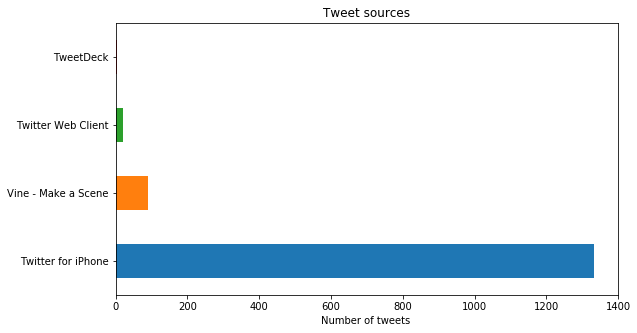

In [86]:
source_counts.plot('barh', figsize=(9,5), title='Tweet sources').set_xlabel("Number of tweets ")
plt.savefig('source')


#### Most tweets were from tweeter for iphone

#### 2. Favorite and retweet counts for different dog stages

In [87]:
print('Doggo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(twitter_archive_master.retweet_count[twitter_archive_master.dog_stage == 'doggo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(twitter_archive_master.favorite_count[twitter_archive_master.dog_stage == 'doggo'].mean())))

print('Floofer')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(twitter_archive_master.retweet_count[twitter_archive_master.dog_stage == 'floofer'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(twitter_archive_master.favorite_count[twitter_archive_master.dog_stage == 'floofer'].mean())))

print('Pupper')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(twitter_archive_master.retweet_count[twitter_archive_master.dog_stage == 'pupper'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(twitter_archive_master.favorite_count[twitter_archive_master.dog_stage == 'pupper'].mean())))

print('Puppo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(twitter_archive_master.retweet_count[twitter_archive_master.dog_stage == 'puppo'].mean())))
print('%s\t%s' % ('Mean Favorite Count',
                  round(twitter_archive_master.favorite_count[twitter_archive_master.dog_stage == 'puppo'].mean())))


Doggo
Mean Retweet Count	5577.0
Mean Favorite Count	16490.0
Floofer
Mean Retweet Count	4084.0
Mean Favorite Count	11675.0
Pupper
Mean Retweet Count	2686.0
Mean Favorite Count	7980.0
Puppo
Mean Retweet Count	7564.0
Mean Favorite Count	24432.0


## 3. Determining common dog stage

In [88]:
 twitter_archive_master['dog_stage'].value_counts()

pupper     151
doggo       60
puppo       20
floofer     10
Name: dog_stage, dtype: int64

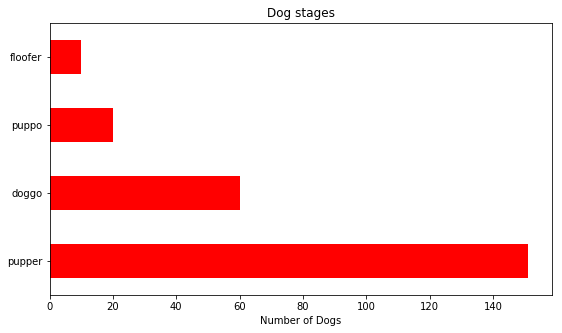

In [89]:
twitter_archive_master['dog_stage'].value_counts().plot('barh', figsize=(9,5), title='Dog stages', color='r').set_xlabel("Number of Dogs")
plt.savefig('dog_stages')

#### The most common dog stage is pupper followed by doggo, then puppo. Floofer is  the least common dog type. 

### 4.Common dog names

In [90]:
twitter_archive_master['name'].value_counts()

None       406
Cooper      10
Oliver      10
Charlie      8
Tucker       8
Sadie        7
Penny        6
Lucy         6
Koda         6
Oscar        5
Winston      5
Stanley      5
Leo          5
Toby         5
Bo           5
Daisy        5
Jax          4
Cassie       4
Lola         4
Sammy        4
Dexter       4
Maggie       4
Reggie       4
Jeffrey      4
Brody        4
Finn         4
Bella        4
Larry        4
Gus          4
Rusty        4
          ... 
Shadoe       1
Toffee       1
Swagger      1
Suki         1
Grizzie      1
Link         1
Moe          1
Acro         1
Lennon       1
Bradlay      1
Jimison      1
Kevin        1
Caryl        1
Beebop       1
Adele        1
Gustaf       1
Ziva         1
Glenn        1
Stormy       1
Monster      1
Margo        1
Albert       1
Dobby        1
Ronnie       1
Shawwn       1
Gunner       1
Monty        1
Gidget       1
Willem       1
Ralphus      1
Name: name, Length: 733, dtype: int64

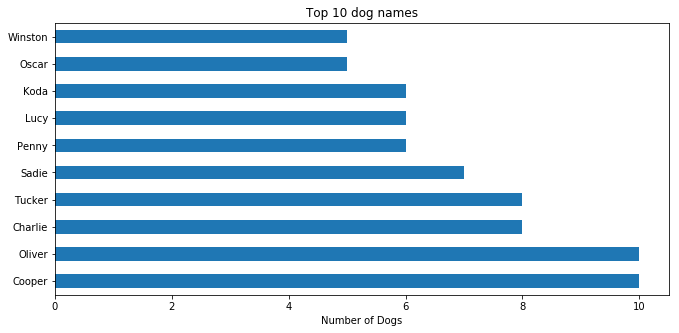

In [91]:
base_color = sb.color_palette()[0]
twitter_archive_master.name.value_counts()[1:11].plot('barh', figsize=(11,5), title='Top 10 dog names', color= base_color).set_xlabel("Number of Dogs")
plt.savefig('names')

### Oliver and Cooper are the most common dog names followed by Tucker then Charlie.

### 5. Comparing dog stage with the count of retweets each dog stage had.

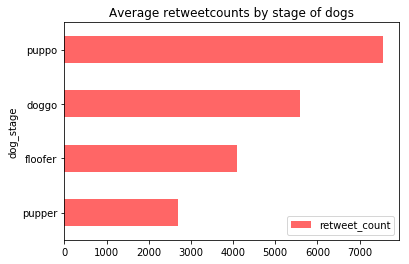

In [92]:
twitter_archive_master_dogstage= twitter_archive_master[twitter_archive_master["dog_stage"].isnull()==False]
stage = twitter_archive_master_dogstage.query('dog_stage =="pupper" or dog_stage =="doggo" or dog_stage =="puppo" or dog_stage =="floofer"')
retweet_count_by_stage = pd.DataFrame(stage.groupby('dog_stage').retweet_count.mean().sort_values())
retweet_count_by_stage['dog_stage'] = retweet_count_by_stage.index
retweet_count_by_stage.plot(x="dog_stage",y='retweet_count',kind='barh',title="Average retweetcounts by stage of dogs",color='r', alpha=0.6)

#### Puppo  had the most number of retweets. Pupper had the least number of retweets

##  6.Comparing dog stage with the favorite count each dog stage had.

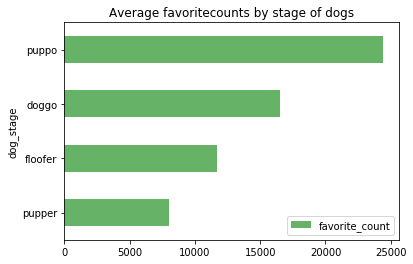

In [93]:
twitter_archive_master_dogstage1= twitter_archive_master[twitter_archive_master["dog_stage"].isnull()==False]
stage_1 = twitter_archive_master_dogstage1.query('dog_stage =="pupper" or dog_stage =="doggo" or dog_stage =="puppo" or dog_stage =="floofer"')
favorite_count_by_stage = pd.DataFrame(stage_1.groupby('dog_stage').favorite_count.mean().sort_values())
favorite_count_by_stage['dog_stage'] = retweet_count_by_stage.index
favorite_count_by_stage.plot(x="dog_stage",y='favorite_count',kind='barh',title="Average favoritecounts by stage of dogs",color='g', alpha=0.6)

#### Puppo had the most favorite counts and pupper had the least favorite counts.

#### Puppo had the most retweets and favorites compared to other dog stages. and pupper had the least retweets and favorite counts

## 7.Determining whether there is a correlation between favorites and retweets.

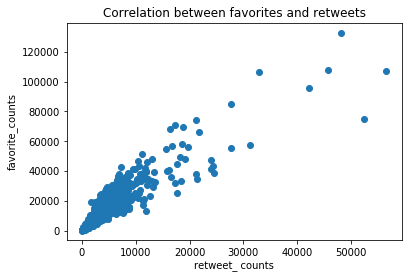

In [94]:
x = twitter_archive_master['retweet_count']
y = twitter_archive_master['favorite_count']
plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':150})

plt.title('Correlation between favorites and retweets')
plt.xlabel('retweet_ counts')
plt.ylabel('favorite_counts')
plt.show()

### There is positive correlation between favorite_counts and retweet_counts

### 8.Determining the pattern of retweets and favorites across the years

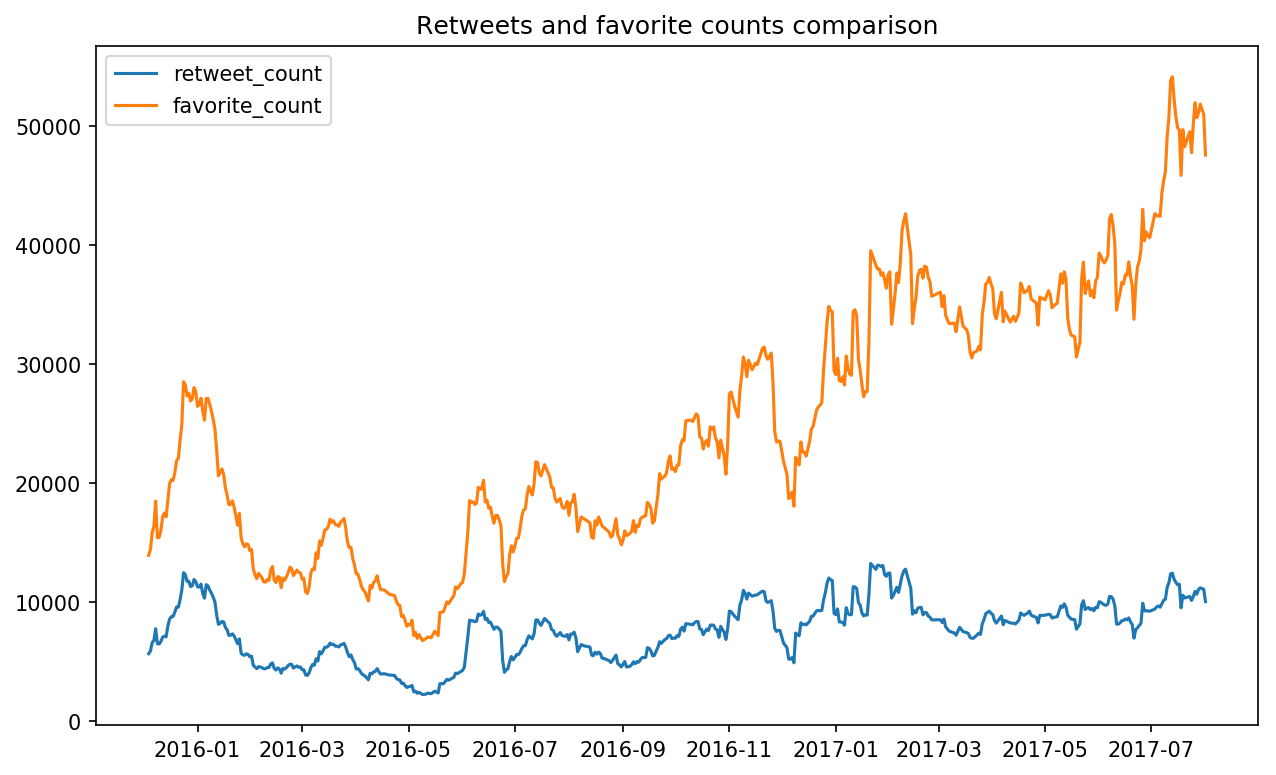

In [95]:
twitter_archive_master['date'] = twitter_archive_master['timestamp'].dt.date
twitter_archive_master1 = twitter_archive_master[['date', 'retweet_count']].groupby(['date']).sum()
twitter_archive_master1['retweet_count'] = twitter_archive_master1['retweet_count'].rolling(window=20).mean()

twitter_archive_master2= twitter_archive_master[['date', 'favorite_count']].groupby(['date']).sum()
twitter_archive_master2['favorite_count'] = twitter_archive_master2['favorite_count'].rolling(window=20).mean()

# Compare trends on a log scale for y axis
fig, axs = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10,6))

axs.set_title('Retweets and favorite counts comparison')
#axs.set_yscale('log')
axs.plot(twitter_archive_master1, label='retweet_count')
axs.plot(twitter_archive_master2, label='favorite_count')
axs.legend()

plt.show()


#### The number of favorite are always more than retweets
#### The highest retweet count was in 2017 February and the highest favorite count was in 2017 September 
#### The lowest retweet count and favorite count occured at the same timestamp.

### 9. Determining whether there is correlation between favorite count and dog name

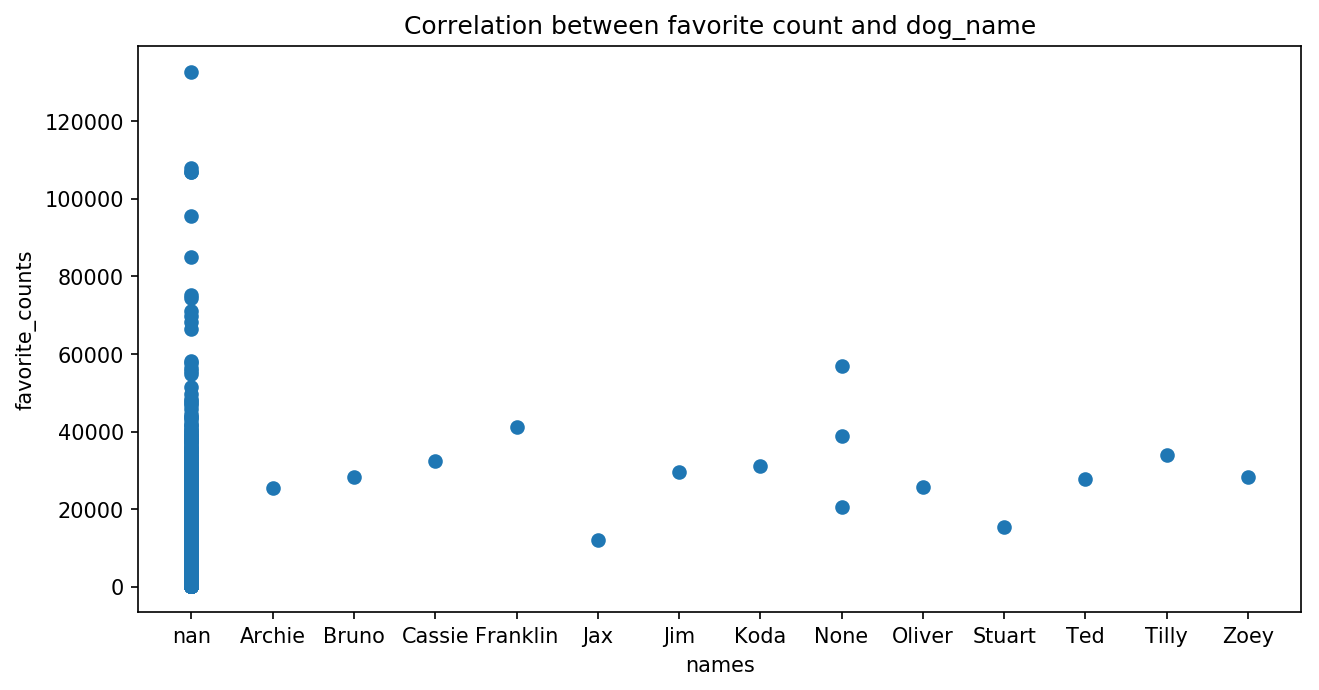

In [96]:
twitter_archive_master['name'] = twitter_archive_master['name'].iloc[0:15]
x = twitter_archive_master['name']
y = twitter_archive_master['favorite_count']
plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':100})

plt.title('Correlation between favorite count and dog_name')
plt.xlabel('names')
plt.ylabel('favorite_counts')
plt.show()

#### There is no correlation between dog names and  favorite counts.

## Conclusion

#### In my analysis I have used both visual and programmatic assessment to assess my data. I have cleaned various data quality and tidiness issues in the datasets and merged the three datasets to one master data. It is clear that of the four dog stages i.e( fluffer,doggo,puppo and pupper) Pupper is the most common dog stage but with the least retweets and favorites.
#### There is a correlation between favorites and retweets. While Copper and Oliver are the most common dog names.
#### The favorites counts increase with a wider range than retweets counts.